# 世代交叠模型

在这节课中，我们将学习著名的世代交叠（OLG）模型。政策制定者和研究人员使用这个模型来研究：
* 财政政策
* 货币政策
* 长期增长
以及许多其他主题。

OLG模型的第一个严谨版本是由Paul Samuelson开发的{cite}`samuelson1958exact`。

我们的目标是对OLG模型的一个简单版本有深入的理解。

## 概述

OLG模型的动态与[索洛-斯旺增长模型](https://intro.quantecon.org/solow.html)非常相似。

同时，OLG模型增加了一个重要的新特征：储蓄量的选择是内生的。

为了理解这一点的重要性，假设我们想预测一项新税收对长期增长的影响。

我们可以在索洛-斯旺模型中添加一项税收，然后观察稳态的变化。

但这忽略了一个事实：当面对新的税率时，家庭会改变他们的储蓄和消费行为。

这些变化可能会大大改变模型的预测。

因此，如果我们关心准确的预测，我们应该对代理人的决策问题进行建模。

特别是，模型中的家庭应该根据他们面临的环境（技术、税收、价格等）决定储蓄多少和消费多少。

OLG模型应对了这一挑战。

我们将介绍OLG模型的一个简单版本，阐明家庭的决策问题，并研究其对长期增长的影响。

让我们从一些导入开始。

In [1]:
import numpy as np
from scipy import optimize
from collections import namedtuple
import matplotlib.pyplot as plt

## 环境
我们假设时间是离散的，因此 $t=0, 1, \ldots$。
在时间 $t$ 出生的个体存活两个时期，$t$ 和 $t + 1$。
我们称一个个体
- 在生命的第一个时期为"年轻人"
- 在生命的第二个时期为"老年人"。
年轻人工作，提供劳动并赚取劳动收入。
他们还决定存多少钱。
老年人不工作，所以所有收入都是金融收入。
他们的金融收入来自工资收入的储蓄利息，
这些储蓄随后与 $t+1$ 时期新的年轻一代的劳动相结合。
工资和利率在均衡中由供求决定。
为了使代数计算稍微简单一些，我们假设人口规模恒定。
我们将每个时期的恒定人口规模标准化为1。
我们还假设每个个体提供一个"单位"的劳动时间，因此总劳动供给为1。

## 资本供给
首先让我们考虑家庭方面。

### 消费者问题
假设在时间 $t$ 出生的个体的效用函数形式为

```{math}
:label: eq_crra

    U_t = u(c_t) + \beta u(c_{t+1})
```

这里

- $u: \mathbb R_+ \to \mathbb R$ 被称为"流量"效用函数
- $\beta \in (0, 1)$ 是贴现因子
- $c_t$ 是在时间 $t$ 出生的个体在时间 $t$ 的消费
- $c_{t+1}$ 是同一个体在时间 $t+1$ 的消费
我们假设 $u$ 是严格递增的。
储蓄行为由以下优化问题决定


```{math}
:label: max_sav_olg
    \max_{c_t, c_{t+1}} 
    \,  \left \{ u(c_t) + \beta u(c_{t+1}) \right \} 
```

受制于

$$
     c_t + s_t \le w_t 
     \quad \text{and} \quad
     c_{t+1}   \le R_{t+1} s_t
$$

这里
- $s_t$ 是出生于时间 $t$ 的个人的储蓄
- $w_t$ 是时间 $t$ 的工资率
- $R_{t+1}$ 是在时间 $t$ 投资的储蓄在时间 $t+1$ 支付的总利率

由于 $u$ 是严格递增的，这两个约束在最大值时都将成为等式。

利用这一事实，并将第一个约束中的 $s_t$ 代入第二个约束，我们得到
$c_{t+1} = R_{t+1}(w_t - c_t)$。

最大值的一阶条件可以通过将 $c_{t+1}$ 代入目标函数，对 $c_t$ 求导，
并将其设为零来获得。

这导致了OLG模型的**欧拉方程**，它描述了最优的跨期消费动态：

```{math}
:label: euler_1_olg
    u'(c_t) = \beta R_{t+1}  u'( R_{t+1} (w_t - c_t))
```

从第一个约束我们得到 $c_t = w_t - s_t$，所以欧拉方程
也可以表示为

```{math}
:label: euler_2_olg
    u'(w_t - s_t) = \beta R_{t+1}  u'( R_{t+1} s_t)
```

假设对于每个 $w_t$ 和 $R_{t+1}$，恰好有一个 $s_t$ 可以
解决 [](euler_2_olg)。
那么储蓄可以被写成 $w_t$ 和 $R_{t+1}$ 的固定函数。
我们将其表示为

```{math}
:label: saving_1_olg
    s_t = s(w_t, R_{t+1})
```

$s$ 函数的具体形式将取决于流效用函数 $u$ 的选择。
$w_t$ 和 $R_{t+1}$ 共同代表经济中的*价格*（劳动力价格和资本租赁率）。
因此，[](saving_1_olg) 表示给定价格下的储蓄量。

### 示例：对数偏好

在特殊情况 $u(c) = \log c$ 下，欧拉方程简化为
    $s_t= \beta (w_t - s_t)$。
求解储蓄，我们得到

```{math}
:label: saving_log_2_olg
    s_t = s(w_t, R_{t+1}) = \frac{\beta}{1+\beta} w_t
```

在这种特殊情况下，储蓄不依赖于利率。

### 储蓄和投资

由于人口规模被标准化为1，$s_t$也代表了t时期经济中的总储蓄。

在我们的封闭经济中，没有外国投资，所以净储蓄等于总投资，这可以理解为对企业的资本供给。

在下一节中，我们将研究资本需求。

通过使供给和需求相等，我们将能够确定OLG经济中的均衡。

## 资本需求

首先我们描述企业的问题，然后我们写出一个方程来描述给定价格下的资本需求。

### 企业问题

对于每个整数 $t \geq 0$，t期的产出 $y_t$ 由**[柯布-道格拉斯生产函数](https://en.wikipedia.org/wiki/Cobb%E2%80%93Douglas_production_function)**给出

```{math}
:label: cobb_douglas
    y_t = k_t^{\alpha} \ell_t^{1-\alpha}
```

在这里，$k_t$ 是资本，$\ell_t$ 是劳动，而 $\alpha$ 是一个参数（有时被称为"资本的产出弹性"）。
公司的利润最大化问题是

```{math}
:label: opt_profit_olg
    \max_{k_t, \ell_t} \{ k^{\alpha}_t \ell_t^{1-\alpha} - R_t k_t -w_t \ell_t  \}
```
一阶条件是通过分别对资本和劳动求目标函数的导数，并将它们设为零来获得的：

```{math}
    (1-\alpha)(k_t / \ell_t)^{\alpha} = w_t
    \quad \text{and} \quad
    \alpha (k_t / \ell_t)^{\alpha - 1} = R_t
```


### 需求

我们的假设$\ell_t = 1$ 让我们可以

```{math}
:label: wage_one
    w_t = (1-\alpha)k_t^\alpha 
```

并且

```{math}
:label: interest_rate_one
    R_t =
    \alpha k_t^{\alpha - 1} 
```

重新整理 [](interest_rate_one) 得出在时间 $t+1$ 的总资本需求

```{math}
:label: aggregate_demand_capital_olg
    k^d (R_{t+1}) 
    := \left (\frac{\alpha}{R_{t+1}} \right )^{1/(1-\alpha)}
```

在Python中

In [2]:
def capital_demand(R, α):
    return (α/R)**(1/(1-α)) 

In [3]:
def capital_supply(R, β, w):
    R = np.ones_like(R)
    return R * (β / (1 + β)) * w

下图绘制了资本供给曲线（如[](saving_log_2_olg)所示）以及资本需求曲线（如[](aggregate_demand_capital_olg)所示），这两条曲线都是利率$R_{t+1}$的函数。
（对于对数效用这一特殊情况，供给不依赖于利率，因此我们得到一个常数函数。）

## 均衡

在本节中，我们将推导均衡条件并研究一个例子。

### 均衡条件

在均衡状态下，t时刻的储蓄等于t时刻的投资，也等于t+1时刻的资本供给。
通过将这些数量设为相等来计算均衡，即

```{math}
:label: equilibrium_1
    s(w_t, R_{t+1}) 
    = k^d(R_{t+1})
    = \left (\frac{\alpha}{R_{t+1}} \right )^{1/(1-\alpha)}
```


原则上，我们现在可以给定$w_t$来求解均衡价格$R_{t+1}$。
（实际上，我们首先需要指定函数$u$，从而得到$s$。）
当我们求解这个关于$t+1$时刻结果的方程时，$t$时刻的量已经确定，所以我们可以将$w_t$视为常数。
从均衡$R_{t+1}$和[](aggregate_demand_capital_olg)，我们可以得到
均衡数量$k_{t+1}$。

### 示例：对数效用

在对数效用的情况下，我们可以使用[](equilibrium_1)和[](saving_log_2_olg)得到

```{math}
:label: equilibrium_2
    \frac{\beta}{1+\beta} w_t
    = \left( \frac{\alpha}{R_{t+1}} \right)^{1/(1-\alpha)}
```

求解均衡利率得到

```{math}
:label: equilibrium_price
    R_{t+1} = 
    \alpha 
    \left( 
        \frac{\beta}{1+\beta} w_t
    \right)^{\alpha-1}
```

在Python中，我们可以通过以下方式计算这个

In [4]:
def equilibrium_R_log_utility(α, β, w):
    R = α * ( (β * w) / (1 + β))**(α - 1)
    return R

在对数效用的情况下，由于资本供给不依赖于利率，均衡数量是由供给固定的。
也就是说，

```{math}
:label: equilibrium_quantity
    k_{t+1} = s(w_t, R_{t+1}) = \frac{\beta }{1+\beta} w_t
```

让我们重新绘制上面的图，但这次加入均衡数量和价格。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38656 (\N{CJK UNIFIED IDEOGRAPH-9700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27714 (\N{CJK UNIFIED IDEOGRAPH-6C42}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20379 (\N{CJK UNIFIED IDEOGRAPH-4F9B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.

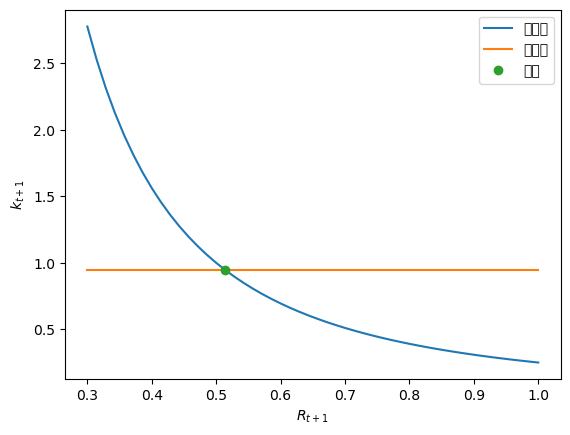

In [5]:
R_vals = np.linspace(0.3, 1)
α, β = 0.5, 0.9
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, α), 
        label="总需求")
ax.plot(R_vals, capital_supply(R_vals, β, w), 
        label="总供给")

R_e = equilibrium_R_log_utility(α, β, w)
k_e = (β / (1 + β)) * w

ax.plot(R_e, k_e, 'o',label='均衡')

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

## 动力学

在本节中，我们讨论动力学。
目前，我们将重点关注对数效用的情况，因此均衡由[](equilibrium_quantity)决定。

### 资本的演变

上述讨论展示了如何在给定$w_t$的情况下获得均衡$k_{t+1}$。
从[](wage_one)中，我们可以将此转换为$k_{t+1}$作为$k_t$的函数。
特别是，由于$w_t = (1-\alpha)k_t^\alpha$，我们有

```{math}
:label: law_of_motion_capital
    k_{t+1} = \frac{\beta}{1+\beta} (1-\alpha)(k_t)^{\alpha}
```

如果我们对这个方程进行迭代，我们将得到一个资本存量序列。
让我们绘制这些动态的45度图，我们将其表示为
$$
    k_{t+1} = g(k_t)
    \quad \text{其中 }
    g(k) := \frac{\beta}{1+\beta} (1-\alpha)(k)^{\alpha}
$$

In [6]:
def k_update(k, α, β):
    return β * (1 - α) * k**α /  (1 + β)

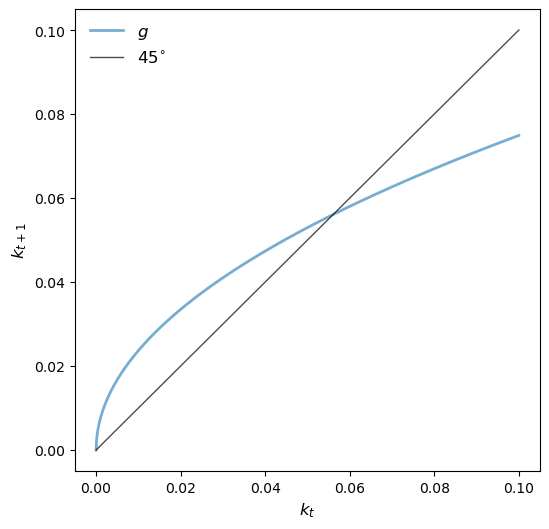

In [7]:
α, β = 0.5, 0.9
kmin, kmax = 0, 0.1
n = 1000
k_grid = np.linspace(kmin, kmax, n)
k_grid_next = k_update(k_grid,α,β)

fig, ax = plt.subplots(figsize=(6, 6))

ymin, ymax = np.min(k_grid_next), np.max(k_grid_next)

ax.plot(k_grid, k_grid_next,  lw=2, alpha=0.6, label='$g$')
ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')


ax.legend(loc='upper left', frameon=False, fontsize=12)
ax.set_xlabel('$k_t$', fontsize=12)
ax.set_ylabel('$k_{t+1}$', fontsize=12)

plt.show()

### 稳态（对数情况）

图表显示，该模型具有唯一的正稳态，我们将其表示为$k^*$。
我们可以通过设置$k^* = g(k^*)$来求解$k^*$，即

```{math}
:label: steady_state_1
    k^* = \frac{\beta (1-\alpha) (k^*)^{\alpha}}{(1+\beta)}
```

求解方程得到

```{math}
:label: steady_state_2
    k^* = \left (\frac{\beta (1-\alpha)}{1+\beta} \right )^{1/(1-\alpha)}
```
我们可以从[](interest_rate_one)得到稳态利率，即
$$
    R^* = \alpha (k^*)^{\alpha - 1} 
        = \frac{\alpha}{1 - \alpha} \frac{1 + \beta}{\beta}
$$
在Python中，我们有

In [8]:
k_star = ((β * (1 - α))/(1 + β))**(1/(1-α))
R_star = (α/(1 - α)) * ((1 + β) / β)

### 时间序列

上面的45度图显示，具有正初始条件的资本时间序列会收敛到这个稳态。
让我们绘制一些时间序列来可视化这一点。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36164 (\N{CJK UNIFIED IDEOGRAPH-8D44}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


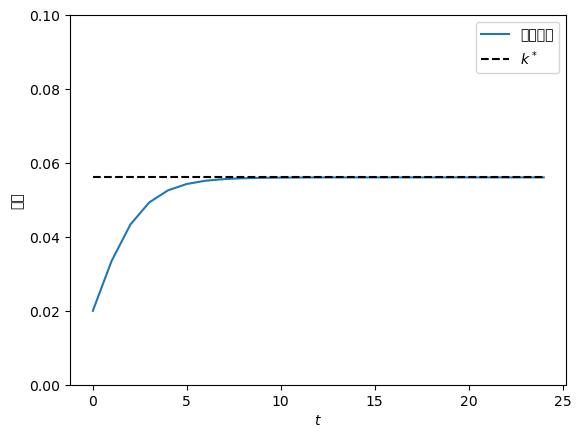

In [9]:
ts_length = 25
k_series = np.empty(ts_length)
k_series[0] = 0.02
for t in range(ts_length - 1):
    k_series[t+1] = k_update(k_series[t], α, β)

fig, ax = plt.subplots()
ax.plot(k_series, label="资本序列")
ax.plot(range(ts_length), np.full(ts_length, k_star), 'k--', label="$k^*$")
ax.set_ylim(0, 0.1)
ax.set_ylabel("资本")
ax.set_xlabel("$t$")
ax.legend()
plt.show()

如果你尝试不同的正初始条件，你会发现这个序列总是收敛于$k^*$。

下面我们还绘制了随时间变化的总利率。

/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27611 (\N{CJK UNIFIED IDEOGRAPH-6BDB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21033 (\N{CJK UNIFIED IDEOGRAPH-5229}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/runner/miniconda3/envs/quantecon/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


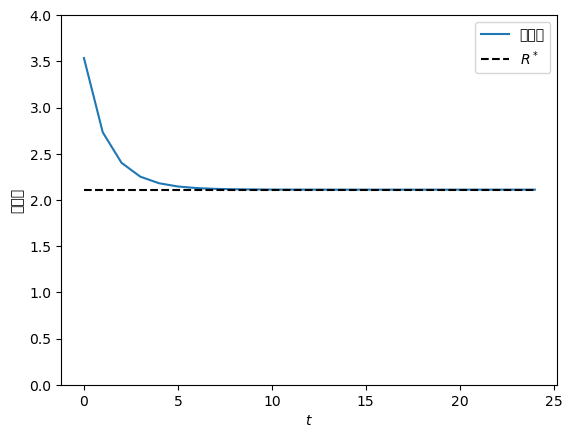

In [10]:
R_series = α * k_series**(α - 1)

fig, ax = plt.subplots()
ax.plot(R_series, label="毛利率")
ax.plot(range(ts_length), np.full(ts_length, R_star), 'k--', label="$R^*$")
ax.set_ylim(0, 4)
ax.set_ylabel("毛利率")
ax.set_xlabel("$t$")
ax.legend()
plt.show()

利率反映了资本的边际产出，当资本存量较低时，利率较高。

## CRRA偏好
此前，在我们的例子中，我们研究了对数效用的情况。
对数效用是CRRA效用在$\gamma \to 1$时的一个特殊情况。
在本节中，我们假设$u(c) = \frac{ c^{1-\gamma}-1}{1-\gamma}$，其中$\gamma >0, \gamma\neq 1$。
这个函数被称为CRRA效用函数。
在其他方面，模型保持不变。
下面我们用Python定义效用函数，并构造一个`namedtuple`来存储参数。

In [11]:
def crra(c, γ):
    return c**(1 - γ) / (1 - γ)

Model = namedtuple('Model', ['α',        # 柯布-道格拉斯参数
                             'β',        # 折现因子
                             'γ']        # CRRA效用函数中的参数
                   )

def create_olg_model(α=0.4, β=0.9, γ=0.5):
    return Model(α=α, β=β, γ=γ)

让我们也重新定义资本需求函数，使其能够与这个`namedtuple`一起工作。

In [12]:
def capital_demand(R, model):
    return (α/R)**(1/(1-model.α)) 

### 供给
对于家庭来说，欧拉方程变为

```{math}
:label: euler_crra
    (w_t - s_t)^{-\gamma} = \beta R^{1-\gamma}_{t+1}  (s_t)^{-\gamma}
```


求解储蓄，我们得到

```{math}
:label: saving_crra
    s_t 
    = s(w_t, R_{t+1}) 
    = w_t \left [ 
        1 + \beta^{-1/\gamma} R_{t+1}^{(\gamma-1)/\gamma} 
      \right ]^{-1}
```


请注意，与对数情况不同，储蓄现在取决于利率。

In [13]:
def savings_crra(w, R, model):
    α, β, γ = model
    return w / (1 + β**(-1/γ) * R**((γ-1)/γ)) 

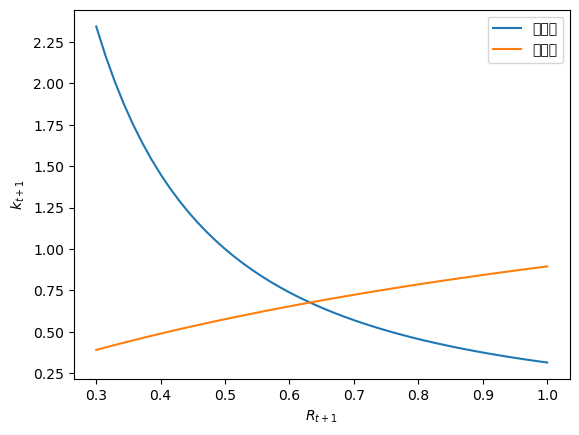

In [14]:
model = create_olg_model()
w = 2.0

fig, ax = plt.subplots()

ax.plot(R_vals, capital_demand(R_vals, model), 
        label="总需求")
ax.plot(R_vals, savings_crra(w, R_vals, model), 
        label="总供给")

ax.set_xlabel("$R_{t+1}$")
ax.set_ylabel("$k_{t+1}$")
ax.legend()
plt.show()

### 均衡

将资本的总需求（参见[](aggregate_demand_capital_olg)）与我们新的总供给函数相等，即可得出均衡资本。
因此，我们设定


```{math}
:label: equilibrium_crra_2
    w_t \left [ 1 + \beta^{-1/\gamma} R_{t+1}^{(\gamma-1)/\gamma} \right ]^{-1} 
    = \left (\frac{R_{t+1}}{\alpha} \right )^{1/(\alpha - 1)}
```

这个表达式相当复杂，我们无法解析地求解 $R_{t+1}$。
将[](interest_rate_one)和[](equilibrium_crra_2)结合起来，得到

```{math}
:label: law_of_motion_capital_crra
    k_{t+1} = \left [ 1 + \beta^{-1/\gamma} (\alpha k^{\alpha - 1}_{t+1})^{(\gamma-1)/\gamma} \right ]^{-1} (1-\alpha)(k_t)^{\alpha}
```

同样，有了这个等式和给定的 $k_t$，我们无法用纸笔求解 $k_{t+1}$。
在下面的练习中，你将被要求用数值方法解这些方程。

## 练习


```{exercise}
:label: olg_ex1

使用[](law_of_motion_capital_crra)在 CRRA 情况下数值求解均衡资本存量的动态。
使用 45 度图来可视化这个动态过程。

```


```{solution-start} olg_ex1
:class: dropdown
```


为了在给定 $k_t$ 的情况下求解 $k_{t+1}$，我们使用[牛顿法](https://python.quantecon.org/newton_method.html)。
设

```{math}
:label: crra_newton_1
    f(k_{t+1}, k_t)
    =
    k_{t+1} 
    \left[ 
        1 + \beta^{-1/\gamma} 
        \left ( 
            \alpha k^{\alpha-1}_{t+1} 
        \right )^{(\gamma-1)/\gamma} 
    \right] - (1-\alpha) k^{\alpha}_t =0
```

如果给定了 $k_t$，那么 $f$ 就是未知数 $k_{t+1}$ 的函数。
然后我们可以使用 `scipy.optimize.newton` 求解 $f(k_{t+1}, k_t)=0$ 来得到 $k_{t+1}$。
首先让我们定义 $f$。

In [15]:
def f(k_prime, k, model):
    α, β, γ = model.α, model.β, model.γ
    z = (1 - α) * k**α
    a = α**(1-1/γ)
    b = k_prime**((α * γ - α + 1) / γ)
    p = k_prime + k_prime * β**(-1/γ) * a * b
    return p - z

现在让我们定义一个函数来找出 $k_{t+1}$ 的值。

In [16]:
def k_update(k, model):
    return optimize.newton(lambda k_prime: f(k_prime, k, model), 0.1)

最后，这是 45 度图。

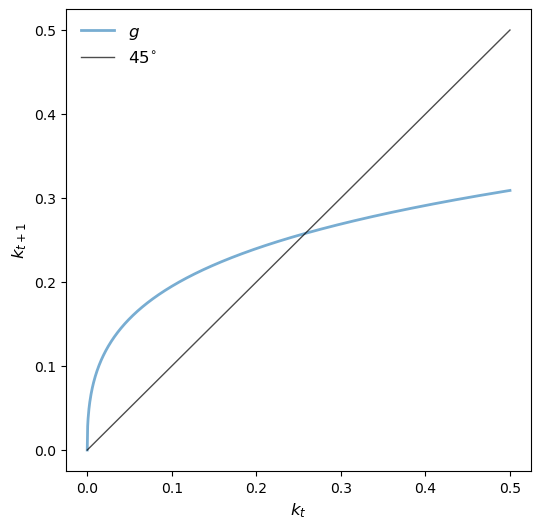

In [17]:
kmin, kmax = 0, 0.5
n = 1000
k_grid = np.linspace(kmin, kmax, n)
k_grid_next = np.empty_like(k_grid)

for i in range(n):
    k_grid_next[i] = k_update(k_grid[i], model)

fig, ax = plt.subplots(figsize=(6, 6))

ymin, ymax = np.min(k_grid_next), np.max(k_grid_next)

ax.plot(k_grid, k_grid_next,  lw=2, alpha=0.6, label='$g$')
ax.plot(k_grid, k_grid, 'k-', lw=1, alpha=0.7, label='$45^{\circ}$')


ax.legend(loc='upper left', frameon=False, fontsize=12)
ax.set_xlabel('$k_t$', fontsize=12)
ax.set_ylabel('$k_{t+1}$', fontsize=12)

plt.show()

```{solution-end}
```


```{exercise}
:label: olg_ex2

上一个练习中的45度图表明存在唯一的正稳态。

通过在[](law_of_motion_capital_crra)中设置 $k_{t+1} = k_t = k^*$，可以得到正稳态，即：

$$
    k^* = 
    \frac{(1-\alpha)(k^*)^{\alpha}}
    {1 + \beta^{-1/\gamma} (\alpha (k^*)^{\alpha-1})^{(\gamma-1)/\gamma}}
$$

与对数效用情况不同，CRRA效用的稳态 $k^*$ 无法通过解析方法获得。

相反，我们使用牛顿法求解 $k^*$。
```


```{solution-start} olg_ex2
:class: dropdown
```
我们引入一个函数 $h$，使得
正稳态是 $h$ 的根。

```{math}
:label: crra_newton_2
    h(k^*) = k^*  
    \left [ 
        1 + \beta^{-1/\gamma} (\alpha (k^*)^{\alpha-1})^{(\gamma-1)/\gamma} 
    \right ] - (1-\alpha)(k^*)^{\alpha}
```

这是用Python写的

In [18]:
def h(k_star, model):
    α, β, γ = model.α, model.β, model.γ
    z = (1 - α) * k_star**α
    R1 = α ** (1-1/γ)
    R2 = k_star**((α * γ - α + 1) / γ)
    p = k_star + k_star * β**(-1/γ) * R1 * R2
    return p - z

让我们运用牛顿法来求根：

In [19]:
k_star = optimize.newton(h, 0.2, args=(model,))
print(f"k_star = {k_star}")

k_star = 0.25788950250843484


```{solution-end}
```




```{exercise}
:label: olg_ex3

根据上面列出的参数化，生成三个资本的时间路径，来自三个不同的初始条件。

使用 $k_0$ 的初始条件为 $0.001, 1.2, 2.6$，并且时间序列长度为 10。

```


```{solution-start} olg_ex3
:class: dropdown
```


让我们定义常数和三个不同的初始条件。

In [20]:
ts_length = 10
k0 = np.array([0.001, 1.2, 2.6])

In [21]:
def simulate_ts(model, k0_values, ts_length):

    fig, ax = plt.subplots()

    ts = np.zeros(ts_length)

    # 模拟并且绘制时间序列
    for k_init in k0_values:
        ts[0] = k_init
        for t in range(1, ts_length):
            ts[t] = k_update(ts[t-1], model)
        ax.plot(np.arange(ts_length), ts, '-o', ms=4, alpha=0.6,
                label=r'$k_0=%g$' %k_init)
    ax.plot(np.arange(ts_length), np.full(ts_length, k_star),
            alpha=0.6, color='red', label=r'$k^*$')
    ax.legend(fontsize=10)

    ax.set_xlabel(r'$t$', fontsize=14)
    ax.set_ylabel(r'$k_t$', fontsize=14)

    plt.show()

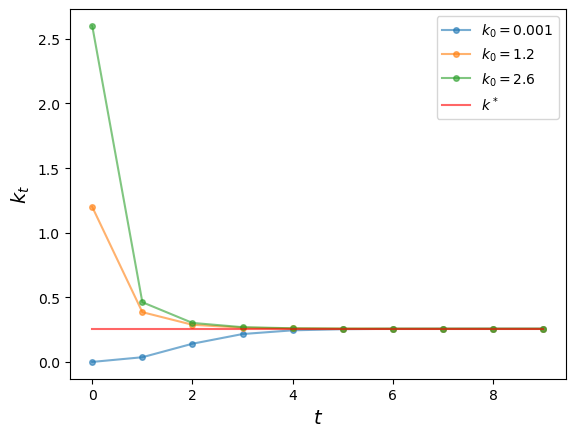

In [22]:
simulate_ts(model, k0, ts_length)

```{solution-end}
```